In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps
import scipy.optimize as sopt
import pymrm as mrm
import time

from particle_model import *
from reactor_model import *

dt = np.inf
Nodes = 100
T_in = 700
P_in = 5*101325


# Choose optimal ratio after
X_CO2_in = 0.35
X_H2_in = 1 - X_CO2_in

C_CO2_in = X_CO2_in*P_in/T_in/8.314
C_H2_in = X_H2_in*P_in/T_in/8.314

c_in = np.array([C_CO2_in,C_H2_in,0,0])

# Q_Joule = 0

# Q_Joule_vector = []
# # d_p_vector = []
# # Ug_vector = []
# pdrop_vector = []
# conversion_vector = []


cases = [(0.01, 7e3, 2, 0.5, 'Case 1'),    # 12
            (0.01, 5e3, 1, 1 ,'Case 2'),    # 13
            (0.001, 5e4, 1 , 1 , 'Case 3'),  # 14
            (0.001, 3e4, 0.5, 2, 'Case 4')]     # 23

d_p ,Lr , gas_velocity , Q_Joule= 1e-2, 2, 2, 0
reactor = reactor_model(Nodes, d_p, Lr, dt, gas_velocity, X_CO2_in, T_in, P_in, Q_Joule ,Maxwell_Stefan=True,c_dependent_diffusion=True)
conversionCO21, pdrop1 = reactor.solve()
cCO2= reactor.c[:,0]
T = reactor.c[:,4]
z = reactor.z_c
print(conversionCO21,pdrop1)

d_p ,Lr , gas_velocity , Q_Joule= 1e-2, 1, 1, 0
reactor1 = reactor_model(Nodes, d_p, Lr, dt, gas_velocity, X_CO2_in, T_in, P_in, Q_Joule,Maxwell_Stefan=True,c_dependent_diffusion=True)
conversionCO22, pdrop2 = reactor1.solve()
cCO21 = reactor1.c[:,0]
T1 = reactor1.c[:,4]
z1 = reactor1.z_c
print(conversionCO22, pdrop2)

d_p ,Lr , gas_velocity , Q_Joule= 1e-3, 1, 1, 0
reactor2 = reactor_model(Nodes, d_p, Lr, dt, gas_velocity, X_CO2_in, T_in, P_in, Q_Joule,Maxwell_Stefan=True,c_dependent_diffusion=True)
conversionCO23, pdrop3 = reactor2.solve()
cCO22 = reactor2.c[:,0]
T2 = reactor2.c[:,4]
z2 = reactor2.z_c
print(conversionCO23, pdrop3)

d_p ,Lr , gas_velocity , Q_Joule= 1e-3, 0.5, 0.5, 0
reactor3 = reactor_model(Nodes, d_p, Lr, dt, gas_velocity, X_CO2_in, T_in, P_in, Q_Joule ,Maxwell_Stefan=True,c_dependent_diffusion=True)
conversionCO24, pdrop4 = reactor3.solve()
cCO23 = reactor3.c[:,0]
T3 = reactor3.c[:,4]
z3 = reactor3.z_c
print(conversionCO24, pdrop4)

0.7637887727815399 7729.374999999942
0.7663315888348896 1133.7968749999418
0.7390947332845469 41510.46875
0.7391958236786649 9379.433593749884


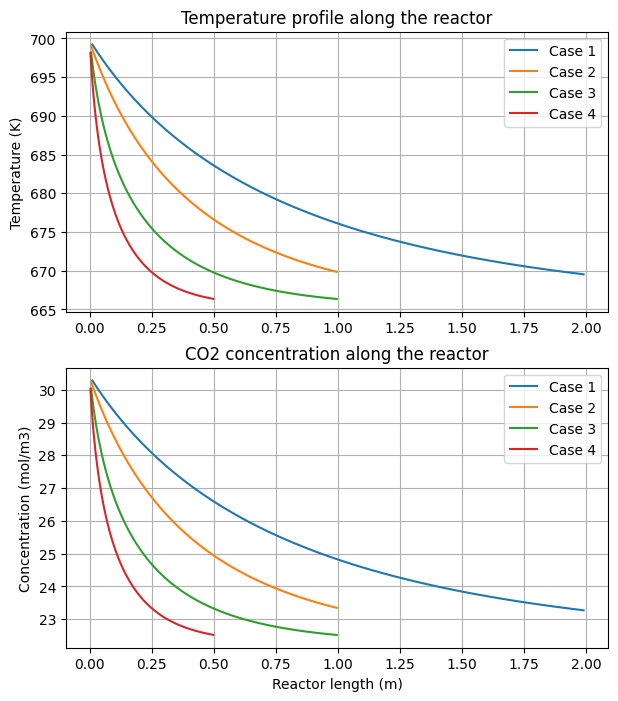

In [11]:
fig, ax = plt.subplots(2,1,figsize = (7,8))

ax[0].plot(z,T,label = 'Case 1')
ax[0].plot(z1,T1,label = 'Case 2')
ax[0].plot(z2,T2,label = 'Case 3')
ax[0].plot(z3,T3,label = 'Case 4')
# ax[0].set_xlabel('Reactor length (m)')
ax[0].set_ylabel('Temperature (K)')
ax[0].set_title('Temperature profile along the reactor')
ax[0].grid()
ax[0].legend()

ax[1].plot(z,cCO2,label = 'Case 1')
ax[1].plot(z1,cCO21,label = 'Case 2')
ax[1].plot(z2,cCO22,label = 'Case 3')
ax[1].plot(z3,cCO23,label = 'Case 4')
ax[1].set_title('CO2 concentration along the reactor')
ax[1].set_xlabel('Reactor length (m)')
ax[1].set_ylabel('Concentration (mol/m3)')
ax[1].grid()
ax[1].legend()

The following cells compute the L1 and L2 error norms to determine the order of convergence of the implemented solver. If the simulations are restarted the case for 500 grids will take 10 mins and 1000 grids will take 20 mins.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps
import scipy.optimize as sopt
import pymrm as mrm
import time

from particle_model import *
from reactor_model import *

dt = np.inf
Nodes = 100
T_in = 700
P_in = 5*101325


# Choose optimal ratio after
X_CO2_in = 0.35
X_H2_in = 1 - X_CO2_in

C_CO2_in = X_CO2_in*P_in/T_in/8.314
C_H2_in = X_H2_in*P_in/T_in/8.314

c_in = np.array([C_CO2_in,C_H2_in,0,0])


d_p ,Lr , gas_velocity , Q_Joule= 1e-2, 1, 2, 0

Nodes = 10
reactor = reactor_model(Nodes, d_p, Lr, dt, gas_velocity, X_CO2_in, T_in, P_in, Q_Joule ,Maxwell_Stefan=True,c_dependent_diffusion=True)
conversionCO21, pdrop1 = reactor.solve()
cCO2= reactor.c[:,0]
T = reactor.c[:,4]
z = reactor.z_c
print(conversionCO21,pdrop1)

Nodes1 = 50
reactor1 = reactor_model(Nodes1, d_p, Lr, dt, gas_velocity, X_CO2_in, T_in, P_in, Q_Joule,Maxwell_Stefan=True,c_dependent_diffusion=True)
conversionCO22, pdrop2 = reactor1.solve()
cCO21 = reactor1.c[:,0]
T1 = reactor1.c[:,4]
z1 = reactor1.z_c
print(conversionCO22, pdrop2)

Nodes = 100
reactor2 = reactor_model(Nodes, d_p, Lr, dt, gas_velocity, X_CO2_in, T_in, P_in, Q_Joule,Maxwell_Stefan=True,c_dependent_diffusion=True)
conversionCO23, pdrop3 = reactor2.solve()
cCO22 = reactor2.c[:,0]
T2 = reactor2.c[:,4]
z2 = reactor2.z_c
print(conversionCO23, pdrop3)

Nodes = 1000
reactor3 = reactor_model(Nodes, d_p, Lr, dt, gas_velocity, X_CO2_in, T_in, P_in, Q_Joule ,Maxwell_Stefan=True,c_dependent_diffusion=True)
conversionCO24, pdrop4 = reactor3.solve()
cCO23 = reactor3.c[:,0]
T3 = reactor3.c[:,4]
z3 = reactor3.z_c
print(conversionCO24, pdrop4)


# I overwrote T3,z3 and cCO23 with the nodes of 1000 which is why the numbering is weird



0.8171683508466482 3631.25
0.8153342419225359 3838.7499999998836
0.8151758739603409 3864.687499999942
0.815078355686147 3888.03125


In [2]:
Nodes = 500
reactor4 = reactor_model(Nodes, d_p, Lr, dt, gas_velocity, X_CO2_in, T_in, P_in, Q_Joule ,Maxwell_Stefan=True,c_dependent_diffusion=True)
conversionCO25, pdrop5 = reactor4.solve()
cCO24 = reactor4.c[:,0]
T4 = reactor4.c[:,4]
z4 = reactor4.z_c
print(conversionCO25, pdrop5)



0.815083396543156 3885.4375


[-0.01794982 -0.00351736 -0.0016739  -0.00018665] [-0.10496421 -0.0205473  -0.00977975 -0.00109065]


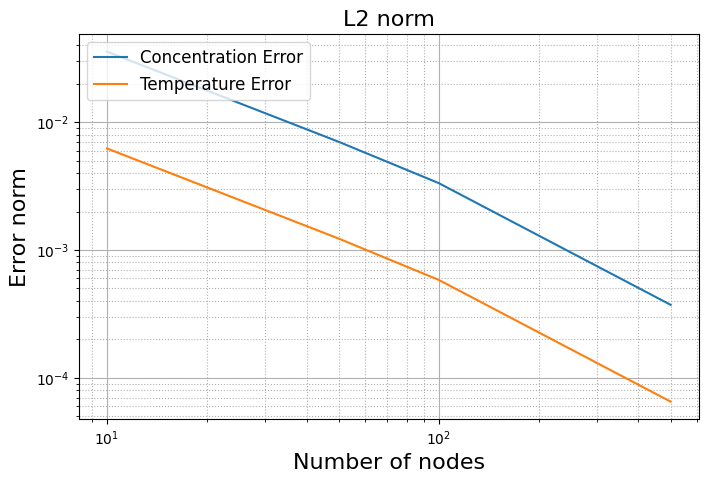

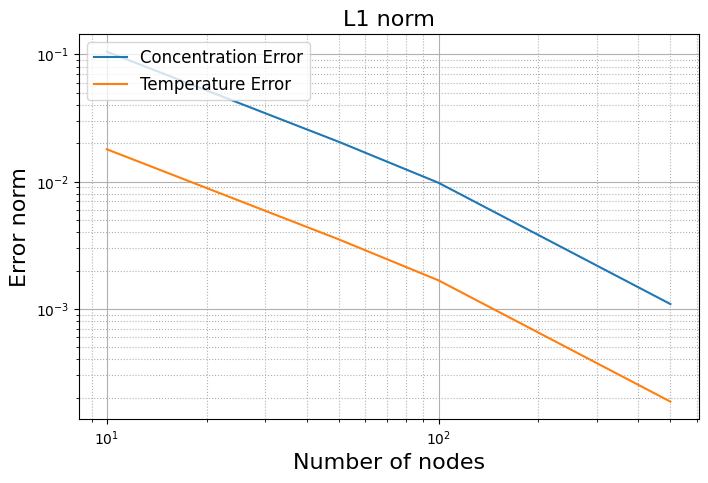

In [9]:
# Compute L0,L1, Linf

# Use the largest grid
# 1000 Nodes
TError4 = T3[::100] 
CO2Error4 = cCO23[::100]


TError = T - TError4
CO2Error = cCO2 -CO2Error4 

# 50 Nodes
TError1 = T1[::5] - TError4
CO2Error1 = cCO21[::5] -CO2Error4 

# 100 Nodes
TError2 = T2[::10] - TError4
CO2Error2 = cCO22[::10] -CO2Error4 


# 500 Nodes
TError3 = T4[::50] - TError4
CO2Error3 = cCO24[::50] -CO2Error4 


node_array = np.array([10,50,100,500])
Temp_L1norm = np.array([np.mean(sum((TError/TError4))),
                    np.mean(sum(TError1/TError4)), 
                    np.mean(sum(TError2/TError4)),
                    np.mean(sum(TError3/TError4))])

Temp_L2norm = np.array([np.sqrt((np.mean(sum((TError/TError4)**2)))),
                   np.sqrt((np.mean(sum((TError1/TError4)**2)))), 
                   np.sqrt((np.mean(sum((TError2/TError4)**2)))), 
                   np.sqrt((np.mean(sum((TError3/TError4)**2))))])


Concentration_L1norm = np.array([np.mean(sum((CO2Error/CO2Error4))),
                    np.mean(sum(CO2Error1/CO2Error4)), 
                    np.mean(sum(CO2Error2/CO2Error4)),
                    np.mean(sum(CO2Error3/CO2Error4))])

Concentration_L2norm = np.array([np.sqrt((np.mean(sum((CO2Error/CO2Error4)**2)))),
                   np.sqrt((np.mean(sum((CO2Error1/CO2Error4)**2)))), 
                   np.sqrt((np.mean(sum((CO2Error2/CO2Error4)**2)))), 
                   np.sqrt((np.mean(sum((CO2Error3/CO2Error4)**2))))])

plt.figure(figsize=(8,5))
plt.loglog(node_array,Concentration_L2norm,label = 'Concentration Error')
plt.title('L2 norm',fontsize=20)
plt.xlabel('Number of nodes',fontsize=16)
plt.ylabel('Error norm',fontsize=16)
plt.loglog(node_array,Temp_L2norm, label = 'Temperature Error')
plt.title('L2 norm',fontsize=16)
plt.xlabel('Number of nodes',fontsize=16)
plt.ylabel('Error norm',fontsize=16)
# plt.xticks(np.linspace(0,0.0025,6),fontsize=12)
# plt.yticks(np.linspace(0,80,5),fontsize=12)
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle=':')
plt.legend(loc='upper left',fontsize=12)





plt.figure(figsize=(8,5))
plt.loglog(node_array, abs(Concentration_L1norm),label = 'Concentration Error')
plt.title('L1 norm',fontsize=20)
plt.xlabel('Number of nodes',fontsize=16)
plt.ylabel('Error norm',fontsize=16)
plt.loglog(node_array,abs(Temp_L1norm), label = 'Temperature Error')
plt.title('L1 norm',fontsize=16)
plt.xlabel('Number of nodes',fontsize=16)
plt.ylabel('Error norm',fontsize=16)
# plt.xticks(np.linspace(0,0.0025,6),fontsize=12)
# plt.yticks(np.linspace(0,80,5),fontsize=12)
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle=':')
plt.legend(loc='upper left',fontsize=12)

print(Temp_L1norm,Concentration_L1norm)